###### PS：首次加载图表可能显示较慢，需要<font color="#FF0000">多刷新一下</font>，希望耐心等待，感谢！

## 目录 

<div class="lev2 toc-item"><a href="#一.EDA" data-toc-modified-id="一.EDA-02"><span class="toc-item-num">&nbsp;&nbsp;</span>一.EDA</a></div><div class="lev3 toc-item"><a href="#1.概览分析" data-toc-modified-id="1.概览分析-021"><span class="toc-item-num">&nbsp;&nbsp;</span>1.概览分析</a></div><div class="lev3 toc-item"><a href="#2.组合分析" data-toc-modified-id="2.组合分析-022"><span class="toc-item-num">&nbsp;&nbsp;</span>2.组合分析</a></div><div class="lev3 toc-item"><a href="#3.场景分析" data-toc-modified-id="3.场景分析-023"><span class="toc-item-num">&nbsp;&nbsp;</span>3.场景分析</a></div><div class="lev2 toc-item"><a href="#二.建模分析" data-toc-modified-id="二.建模分析-03"><span class="toc-item-num">&nbsp;&nbsp;</span>二.建模分析</a></div><div class="lev3 toc-item"><a href="#1.申请评分卡" data-toc-modified-id="1.申请评分卡-031"><span class="toc-item-num">&nbsp;&nbsp;</span>1.申请评分卡</a></div><div class="lev6 toc-item"><a href="#PS：模型运用好坏比，Odds和WOE呈相反趋势模型系数为负值，WOE与业务情况成正比有利于解释模型" data-toc-modified-id="PS：模型运用好坏比，Odds和WOE呈相反趋势模型系数为负值，WOE与业务情况成正比有利于解释模型-031001"></div><div class="lev3 toc-item"><a href="#2.集成模型" data-toc-modified-id="2.集成模型-032"><span class="toc-item-num">&nbsp;&nbsp;</span>2.集成模型</a></div>

In [4]:
import pandas  as pd
import pymysql 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy   as np
from datetime import datetime
%matplotlib inline
sns.set_style("whitegrid")
from plotly.offline import *
# init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import xlrd
import xlwt
import colorlover as cl
from IPython.display import HTML
# import cufflinks as cf
# cf.go_offline()
import matplotlib.ticker as ticker

## 一.EDA

### 1.概览分析

&nbsp;&nbsp;&nbsp;&nbsp;<b>优点</b>：<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)该可视化图表可以与一个时间段进行对比<b><I><U>自动化</I></U></b>产出结论，简单明了且高效。<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)适用在具有<b><U><I>总结性</I></U></b>的可视化报告中。

In [18]:
# 数据
w_income = pd.DataFrame(np.random.rand(21,10),columns= ['备选','A产品',
 'B产品',
 'C产品',
 'D产品',
 'E产品',
 'F产品',
 'G产品',
 'H产品',
 '整体',])
w_income = w_income.applymap(lambda x: int(round(x,5)*100000))

# 数据聚合
o2o_cash = w_income.iloc[:,1].tolist()
o2o_pd = w_income.iloc[:,2].tolist()
o2o_3c = w_income.iloc[:,3].tolist()
prime_cash = w_income.iloc[:,4].tolist()
nano = w_income.iloc[:,5].tolist()
c_shared = w_income.iloc[:,6].tolist()
c_own = w_income.iloc[:,7].tolist()
c_other = w_income.iloc[:,8].tolist()
income_all = w_income.iloc[:,9].tolist()


# 图表
color_t = cl.scales['3']['seq']['Purples']

tt = '⬆️'
dd = '⬇️'
uu = '⚠️'
nn = '👍'
################################以上为公共区
t1 = nano[-1]  #纳米
t2 = nano[-2]
# t1 = format(t1,',')
# t2 = format(t2,',')
if t1 > t2:
    change_rate = (nano[-1]-nano[-2])/nano[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    i = '''本周理论收入为￥<b>%(t1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'t1':t1}
elif t1 < t2:
    change_rate = (nano[-1]-nano[-2])/nano[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    i = '''本周理论收入为￥<b>%(t1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'t1':t1}
else:
    i = '''本周理论收入为￥<b>%(t1)s </b>,与上周持平''' %{'t1':t1}
#######################
oc1 = o2o_cash[-1]  #O2O现金贷
oc2 = o2o_cash[-2]
# oc1 = format(oc1,',')
# oc2 = format(oc2,',')
if oc1 > oc2:
    change_rate = (o2o_cash[-1]-o2o_cash[-2])/o2o_cash[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    o1 = '''本周理论收入为￥<b>%(oc1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'oc1':oc1}
elif oc1 < oc2:
    change_rate = (o2o_cash[-1]-o2o_cash[-2])/o2o_cash[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    o1 = '''本周理论收入为￥<b>%(oc1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'oc1':oc1}
else:
    o1 = '''本周理论收入为￥<b>%(oc1)s </b>,与上周持平''' %{'oc1':oc1}  
#######################
op1 = o2o_pd[-1]  #O2Opd
op2 = o2o_pd[-2]
# op1 = format(op1,',')
# op2 = format(op2,',')
if op1 > op2:
    change_rate = (o2o_pd[-1]-o2o_pd[-2])/o2o_pd[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    o2 = '''本周理论收入为￥<b>%(op1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'op1':op1}
elif op1 < op2:
    change_rate = (o2o_pd[-1]-o2o_pd[-2])/o2o_pd[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    o2 = '''本周理论收入为￥<b>%(op1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'op1':op1}
else:
    o2 = '''本周理论收入为￥<b>%(op1)s </b>,与上周持平''' %{'op1':op1}  
#######################
o3c1 = o2o_3c[-1]  #O2O3c
o3c2 = o2o_3c[-2]
# o3c1 = format(o3c1,',')
# o3c2 = format(o3c2,',')
if o3c1 > o3c2:
    change_rate = (o2o_3c[-1]-o2o_3c[-2])/o2o_3c[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    o3 = '''本周理论收入为￥<b>%(o3c1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'o3c1':o3c1}
elif o3c1 < o3c2:
    change_rate = (o2o_pd[-1]-o2o_pd[-2])/o2o_pd[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    o3 = '''本周理论收入为￥<b>%(o3c1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'o3c1':o3c1}
else:
    o3 = '''本周理论收入为￥<b>%(o3c1)s </b>,与上周持平''' %{'o3c1':o3c1}      
#######################
pc1 = prime_cash[-1]  #大额贷
pc2 = prime_cash[-2]
pc1 = round(pc1)
pc2 = round(pc2)
# pc1 = format(pc1,',')
# pc2 = format(pc2,',')
if pc1 > pc2:
    change_rate = (prime_cash[-1]-prime_cash[-2])/prime_cash[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    ps1 = '''本周理论收入为￥<b>%(pc1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'pc1':pc1}
elif pc1 < pc2:
    change_rate = (prime_cash[-1]-prime_cash[-2])/prime_cash[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    ps1 = '''本周理论收入为￥<b>%(pc1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'pc1':pc1}
else:
    ps1 = '''本周理论收入为￥<b>%(pc1)s </b>,与上周持平''' %{'pc1':pc1}     
#######################
cs1 = c_shared[-1]  #闪贷共担
cs2 = c_shared[-2]
# cs1 = format(cs1,',')
# cs2 = format(cs2,',')
if cs1 > cs2:
    change_rate = (c_shared[-1]-c_shared[-2])/c_shared[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    cshared = '''本周理论收入为￥<b>%(cs1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'cs1':cs1}
elif cs1 < cs2:
    change_rate = (c_shared[-1]-c_shared[-2])/c_shared[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    cshared = '''本周理论收入为￥<b>%(cs1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'cs1':cs1}
else:
    cshared = '''本周理论收入为￥<b>%(cs1)s </b>,与上周持平''' %{'cs1':cs1}     
#######################
co1 = c_own[-1]  #闪贷自营
co2 = c_own[-2]
# co1 = format(co1,',')
# co2 = format(co2,',')
if co1 > co2:
    change_rate = (c_own[-1]-c_own[-2])/c_own[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    cw = '''本周理论收入为￥<b>%(co1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'co1':co1}
elif co1 < co2:
    change_rate = (c_own[-1]-c_own[-2])/c_own[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    cw = '''本周理论收入为￥<b>%(co1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'co1':co1}
else:
    cw = '''本周理论收入为￥<b>%(co1)s </b>,与上周持平''' %{'co1':co1}     
#######################
cr1 = c_other[-1]  #闪贷非自营
cr2 = c_other[-2]
# cr1 = format(cr1,',')
# cr2 = format(cr2,',')
if cr1 > cr2:
    change_rate = (c_other[-1]-c_other[-2])/c_other[-2]
    oo = str(abs(round(change_rate*100, 1))) + '%'
    ce = '''本周理论收入为￥<b>%(cr1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'cr1':cr1}
elif cr1 < cr2:
    change_rate = (c_other[-1]-c_other[-2])/c_other[-2]
    oo = str(abs(round(change_rate*100, 1))) + '%'
    ce = '''本周理论收入为￥<b>%(cr1)s </b>,比上周 <b>%(dd)s  %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'cr1':cr1}
else:
    ce = '''本周理论收入为￥<b>%(cr1)s </b>,与上周持平''' %{'cr1':cr1}     
#######################
ca1 =income_all[-1]  #整体
ca2 =income_all[-2]
ca1 = round(ca1,2)
ca2 = round(ca2,2)
# ca1 = format(ca1,',')
# ca2 = format(ca2,',')
if ca1 > ca2:
    change_rate = (income_all[-1]-income_all[-2])/income_all[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    al = '''本周理论收入为￥<b>%(ca1)s </b>比上周 <b>%(tt)s %(oo)s </b> %(nn)s''' %{'tt': tt,'oo': oo,'nn':nn,'ca1':ca1}
elif ca1 < ca2:
    change_rate = (income_all[-1]-income_all[-2])/income_all[-2]
    oo = str(abs(round(change_rate*100, 2))) + '%'
    al = '''本周理论收入为￥<b>%(ca1)s </b>,比上周 <b>%(dd)s %(oo)s </b>  %(uu)s''' %{'dd': dd,'oo': oo,'uu':uu,'ca1':ca1}
else:
    al = '''本周理论收入为￥<b>%(ca1)s </b>,与上周持平''' %{'ca1':ca1}
    
    
    
    
    
l = [o1,o2,o3,ps1,i,cshared,cw,ce,al]    
values = [['A产品','B产品','C产品','D产品','E产品','F产品','G产品','H产品','整体'],l]

trace0 = go.Table(
  type = 'table',
  columnorder = [1,2],
  columnwidth = [80,200],
  header = dict(
    values = [['<b>2018</b><br><b>本周理论收入</b>']
            ,['<b>总结</b>']],
    line=dict(color='rgba(80,103,132,0.2)', width=0.5),
                fill=dict(color='rgb(64,70,114)'),
    align = ['left','center'],
    font = dict(color = 'white', size = 15),
    height = 40
  ),
  cells = dict(
    values = values,
    line = dict(color = '#506784'),
    fill = dict(color = [color_t[0], 'white']),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12),
    height = 30
    )
)


layout = dict(
    title= '本周与上周各项变化率概览',
    height= 500, width= 900,
#     xaxis2 = dict(domain= [0.79, 0.9],
#                  anchor='y2',showticklabels=False,showgrid=True,
#                  tickfont = dict(family = 'Pt Sans Narrow', size= 11),
#                  tickangle= -30),
#     yaxis2 = dict(anchor='x2',domain=[0.3, 0.75],showticklabels=False,showgrid=True,),
#     margin = dict(t= 75, l= 100)
)


data = [trace0]

py.iplot(data, filename = "Row and Column Size")

### 2.组合分析

&nbsp;&nbsp;&nbsp;&nbsp;<b>优点</b>：<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)该可视化图表可以针对某个细化需求，进行多维度可视化分析，同时根据特定需求给出变化情况。<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)适用在具有<b><U><I>周期性、维度广</I></U></b>的可视化报告中，例如BI或者数据化运营部门产出的日、周、月报表。<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3)该可视化图表可以拖动列与指标进行对比，具有较强<b><U><I>易用性</I></U></b>。

In [134]:
labels = ['交易金额 [¥]',
'卡收入-退卡 [¥]',
'理论收入 [¥]',
'件均 [¥]',
'注册 [人]',
'首提 [人]',
'转化率：注册-首提[％]',
'通过率 [％]',
'现金流 [％]',
'FPD0 [％]',
'FPD7 [％]',
'FPD30 [％]',
'A产品','B产品','C产品','D产品']

df_table = pd.DataFrame(np.random.rand(16,3),index=labels,columns=[ '上周数据', '本周数据', '变化率%'])
df_table1 = df_table[df_table.columns.tolist()[:-1]]
df_table1 = df_table1.applymap(lambda x: round(x*10,2))
df_table1['变化率%'] = df_table['变化率%']
df_table1['变化率%'] = df_table1['变化率%'].apply(lambda x:round(x,2))
df_table = df_table1
df_table.iloc[2:3,2] = -0.94
df_table.iloc[10:11,2] = -0.72
df_table.iloc[7:8,2] = -0.58
df_table.iloc[13:14,2] = -0.33
# df_table

In [174]:


col_good = 'rgb(0,165,0)'
col_bad = 'rgb(231,0,23)'
rowOddColor = 'rgb(255, 255, 255)'
rowEvenColor = 'rgb(245, 245, 245)'
df_color = pd.DataFrame(pd.Series(['rgb(255, 255, 255)','rgb(245, 245, 245)','rgb(255, 255, 255)',
                                             'rgb(245, 245, 245)','rgb(255, 255, 255)']),columns=['color'])

color = []

x = df_table['变化率%'].tolist()[::-1]
for i in x:
    if i > 0:
        color.append(col_good)
    else:
        color.append(col_bad)  


traces = []

traces.append(go.Table(
    domain=dict(x=[0, 0.8],
                y=[0, 0.93]),
    columnwidth=[1, 2, 2, 2],
    header=dict(values= ['']+['<b>类别</b>'] + ['<b>上周数据</b>']+['<b>本周数据</b>']+['<b>变化率%</b>'],
                line=dict(color='rgba(80,103,132,0.2)', width=0.5),
                fill=dict(color='rgb(64,70,114)'),
                align=['center','center','center','center'],
                font=dict(color='white', size=14),
                height=45,
               ),
    cells=dict(values=[['<b>交易</b>','','','','<b>用户</b>','','','<b>风险</b>','','','','','<b>产品</b>'],df_table.index,df_table.iloc[:,0], df_table.iloc[:,1], df_table.iloc[:,2]],
               line=dict(color='rgba(80,103,132,0.2)', width=1),
        fill=dict(color=['rgb(64,70,114)', ['rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(255, 255, 255)'
                                            ,'rgb(255, 255, 255)','rgb(255, 255, 255)','rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(255, 255, 255)']]),
        align=['left','center','center','center'],
#         fill = dict(color = [rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]),
        font=dict(color=['white', '#506784', '#506784', '#506784'], size=12),
        height=30,
        format = [None] * 2+ [",.2f"] * 3 + [',.2f'],  #内容显示格式 保留两位小数
         prefix = [None] * 6,                          #内容显示前缀 可以加货币符号['$', u'\u20BF']
         suffix=[None] * 5 +['%', u'\u20BF'],          #内容显示后缀 可以加百分号
    )
))

              
traces.append(go.Bar(    
    x=df_table['变化率%'].tolist()[::-1],
    y=df_table.index.tolist()[::-1],
    name = '类别',
    xaxis='x2', yaxis='y2',
    marker=dict(color=color),
#     text=['Text A', 'Text B','Text D', 'Text E', 'Text F'], #text可以代替hoverinfo
    textposition='Top',
#     showlegend=False,
    orientation = 'h',
#     width=0.1 
    ))



layout = dict(
    title= '本周与上周概览',
    titlefont = dict(size = 20),
    height= 800, width= 1000,
    xaxis2 = dict(domain= [0.79, 0.95],
                 anchor='y2',showticklabels=False,showgrid=True,
                 tickfont = dict(family = 'Pt Sans Narrow', size= 11),
                 tickangle= -30),
    yaxis2 = dict(anchor='x2',domain=[0.16, 0.87],showticklabels=False,showgrid=True,),
    margin = dict(t= 35, l= 100)
)


annotations = []

for i,u in enumerate([s for s in df_table.index.tolist()[::-1]]):
    annotations.append(dict(x=1.25, y=i, 
                              font=dict(family='Arial', size=9,
                              color='rgb(203,202,202)'),
                              text= u,
                              showarrow=True, 
                              arrowhead=0,          #箭头样式
                              arrowsize=0.01,       #箭头大小（不过好像没什么用）
                              arrowwidth=0.8,       #箭头线粗细
                              ax=8,                 #箭头方向和大小 比较玄学
                              ay=0,                 #箭头方向和大小 比较玄学                      
                           ))


layout['annotations'] = annotations


fig = dict(data=traces, layout=layout)
py.iplot(fig)

### 3.场景分析

&nbsp;&nbsp;&nbsp;&nbsp;<b>优点</b>：<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)该可视化图表适合<b><U><I>定制化</I></U></b>需求，适合度多组合、重复性可视化场景。<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)满足<b><U><I>快速迭代</I></U></b>的要求且不占用开发资源，后期形成固定化需求再开发上线。

In [7]:
# 数据
product = ['A产品','B产品','C产品','D产品','E产品','F产品','G产品','H产品','整体']
df_product30 = pd.DataFrame(np.random.rand(10,9),columns=product,index=pd.date_range('10/01/2018',freq = 'D',periods = 10))
df_product30 = df_product30.applymap(lambda x:round(x,3))
df_product30 = df_product30.T

df_product7 = pd.DataFrame(np.random.rand(10,9),columns=product,index=pd.date_range('10/01/2018',freq = 'D',periods = 10))
df_product7 = df_product7.applymap(lambda x:round(x,3))
df_product7 = df_product7.T

df_product = pd.DataFrame(np.random.rand(10,9),columns=product,index=pd.date_range('10/01/2018',freq = 'D',periods = 10))
df_product = df_product.applymap(lambda x:round(x,3))
df_product = df_product.T

# 图表
traces = []
annotations = []

visible1 = []
visible2 = []
visible3 = []

loop = 0

for df in (df_product30, df_product7, df_product):
    df = df.T
    group_mapping = list(df.columns.drop_duplicates(keep='first'))

    n = str(len(group_mapping))
    colors = reversed(cl.scales[n]['qual']['Paired'])

    loop = loop + 1

    for i, clr in zip(group_mapping, colors):

        if loop == 1:
            visible = False
            visible1.append(False)
            visible2.append(False)
            visible3.append(True)
        elif loop == 2:
            visible = False
            visible1.append(False)
            visible2.append(True)
            visible3.append(False)
        elif loop == 3:
            visible =  True
            visible1.append(True)
            visible2.append(False)
            visible3.append(False)

        traces.append(go.Scatter(
            x=df.index,
            y=df[i],
            mode='lines+markers',
            name=i,
            showlegend=True,
            visible=visible,
            line=dict(color=clr, shape='spline'),
            marker=dict(color=clr)
        ))
        
    dft = df.T
    title = list(dft.columns.drop_duplicates(keep='first'))
    n = len(title)

    annotations.append(dict(x=0.9, y=1.17, text='本周整体逾期率：',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=12),
                            showarrow=False))

    annotations.append(dict(x=0.985, y=1.19, text='<b><i>' + dft[title[n - 1]]['整体'].astype(str) + '%</b></i>',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=20),
                            showarrow=False))

    if dft[title[n - 1]]['整体'] - dft[title[n - 2]]['整体'] > 0:
        compare_text = '较上阶段 ⬆️'
    elif dft[title[n - 1]]['整体'] - dft[title[n - 2]]['整体'] < 0:
        compare_text = '较上阶段 ⬇️'
    else:
        compare_text = '与上阶段变化'

    change_rate = ((dft[title[n - 1]]['整体'] - dft[title[n - 2]]['整体']) * 100
                   / dft[title[n - 2]]['整体'])
    change_rate = str(abs(round(change_rate, 2))) + '%'

    annotations.append(dict(x=1.113, y=1.17, text=compare_text + '  ' + change_rate,
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=12),
                            showarrow=False))

    annotations.append(dict(x=0.9, y=1.07, text='本周逾期率最高：',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=12),
                            showarrow=False))

    annotations.append(dict(x=1.05, y=1.079, text='<b>' + dft[title[n - 1]].idxmax() + '</b>',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=15),
                            showarrow=False))

    annotations.append(dict(x=0.9, y=0.97, text='本周逾期率最低：',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=12),
                            showarrow=False))

    annotations.append(dict(x=1.05, y=0.98, text='<b>' + dft[title[n - 1]].idxmin() + '</b>',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=15),
                            showarrow=False))

#########################################################################################


updatemenus = list([
    dict(
        buttons=list([
            dict(label='FPD0',
                 method='update',
                 args=[{'visible': visible1},
                       {'title': '整体与各产品线FPD0',
                        'annotations': annotations[14:]}]),
            dict(label='FPD7',
                 method='update',
                 args=[{'visible': visible2},
                       {'title': '整体与各产品线FPD7',
                        'annotations': annotations[7:14]}]),
            dict(label='FPD30',
                 method='update',
                 args=[{'visible': visible3},
                       {'title': '整体与各产品线FPD30',
                        'annotations': annotations[0:7]}]),
        ]),
        direction='down',
        pad={'r': 10, 't': 10},
        showactive=True,
        x=0.12,
        xanchor='left',
        y=1.2,
        yanchor='top'
    ),
    dict(
        buttons=list([
            dict(
                args=['type', 'scatter'],
                label='折线图',
                method='restyle'
            ),
            dict(
                args=['type', 'bar'],
                label='柱状图',
                method='restyle'
            ),
            dict(
                args=['type', 'box'],
                label='排名',
                method='restyle'
            )
        ]),
        direction='down',
        pad={'r': 10, 't': 10},
        showactive=True,
        x=0,
        xanchor='left',
        y=1.2,
        yanchor='top'
    ),
])

layout = dict(
    title='整体与各产品线FPD0',
    titlefont = dict(size = 20),
    height=500,
    legend=dict(traceorder='reversed', font=dict(size=10),y=0.8),
    xaxis=dict(ticks='outside', side='bottom', tickfont=dict(family='Pt Sans Narrow', size=10),
               title='每天一更新'),
    yaxis=dict(side='left', domain = [0,0.9],
               tickfont=dict(family='Pt Sans Narrow', size=13),title='比例％'),
    updatemenus=updatemenus
)

layout['annotations'] = annotations[14:21]

fig = dict(data=traces, layout=layout)
py.iplot(fig)

In [8]:
# 数据
channel = ['A渠道','B渠道','C渠道','D渠道','E渠道','F渠道','G渠道','H渠道','Col_sum']

df_channel_old = pd.DataFrame(np.random.rand(20,9),columns=channel,index=pd.date_range('10/01/2018',freq = 'D',periods = 20))
df_channel_old = df_channel_old.applymap(lambda x:round(x,3)*1000)

df_channel_new = pd.DataFrame(np.random.rand(20,9),columns=channel,index=pd.date_range('10/01/2018',freq = 'D',periods = 20))
df_channel_new = df_channel_new.applymap(lambda x:round(x,3)*1000)

# 图表
traces = []
annotations = []
visible1 = []
visible2 = []

loop = 0

for df in (df_channel_new, df_channel_old):

    loop = loop + 1

    group_mapping = list(df.columns.drop_duplicates(keep='first'))
    group_mapping = group_mapping[:-1]

    n = str(len(group_mapping))
    colors = list(reversed(cl.scales[n]['qual']['Pastel1']))

    for i, clr in zip(group_mapping, colors):

        if loop == 1:
            visible = True
            visible1.append(True)
            visible2.append(False)
        elif loop == 2:
            visible = False
            visible1.append(False)
            visible2.append(True)

        traces.append(go.Bar(
            x=df.index,
            y=df[i],
            name=i,
            showlegend=True,
            marker=dict(color=clr),
            xaxis='x2',
            yaxis='y2',
            visible=visible
        ))

    index_list = list(df.index.drop_duplicates(keep='first'))
    n = len(index_list)
    
    values = df[df.index == index_list[n-1]].iloc[:, :-1].values.tolist()

    traces.append(go.Pie(
        labels=list(df.columns[:-1]),
        values=values[0],
        domain=dict(x=[0.8, 1]),
        text=list(df.columns[:-1]),
        showlegend=False,
        marker=dict(colors=colors),
        textfont=dict(size=8),
        visible=visible
    ))

    if loop == 1:
        visible = True
        visible1.append(True)
        visible2.append(False)
    elif loop == 2:
        visible = False
        visible1.append(False)
        visible2.append(True)

    #########################################################################################

    annotations.append(dict(x=-0.05, y=1.31, text='<b>用户类型：</b>',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=12),
                            showarrow=False))

    annotations.append(dict(x=1, y=1.2, text='本阶段收入：',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=12),
                            showarrow=False))

    annotations.append(dict(x=1.085, y=1.235,
                            text='<b><i>' + (df[df.index == index_list[n - 1]]['Col_sum'] / 100).round(
                                2).astype(str).item() + ' M</b></i>',
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=20),
                            showarrow=False))

    if (df[df.index == index_list[n - 1]]['Col_sum']).item() - (
    df[df.index == index_list[n - 2]]['Col_sum']).item() > 0:
        compare_text = '较上阶段 ⬆️'
    elif (df[df.index == index_list[n - 1]]['Col_sum']).item() - (
    df[df.index == index_list[n - 2]]['Col_sum']).item() == 0:
        compare_text = '与上阶段变化'
    elif (df[df.index == index_list[n - 1]]['Col_sum']).item() - (
    df[df.index == index_list[n - 2]]['Col_sum']).item() < 0:
        compare_text = '较上阶段 ⬇️'

    change_rate = ((df[df.index == index_list[n - 1]]['Col_sum'].item() - df[df.index == index_list[n - 2]][
        'Col_sum'].item()) * 100
                   / df[df.index == index_list[n - 2]]['Col_sum'].item())
    change_rate = str(abs(round(change_rate, 2))) + '%'

    annotations.append(dict(x=1.22, y=1.2, text=compare_text + '  ' + change_rate,
                            xref='paper', yref='paper',
                            font=dict(family='Pt Sans Narrow', size=12),
                            showarrow=False))

#########################################################################################

updatemenus = list([
    dict(
        buttons=list([
            dict(label='新用户',
                 method='update',
                 args=[{'visible': visible1},
                       {'title': '各渠道新用户收入',
                        'annotations': annotations[0:4]}]),
            dict(label='复贷用户',
                 method='update',
                 args=[{'visible': visible2},
                       {'title': '各渠道复贷用户收入',
                        'annotations': annotations[4:]}]),
        ]),
        direction='down',
        pad={'r': 10, 't': 10},
        showactive=True,
        x=0.05,
        xanchor='left',
        y=1.4,
        yanchor='top'
    )
])

layout = dict(
    title='各渠道用户情况',
    titlefont=dict(size=20),
    height=380,
    legend=dict(x=1.1,y=0.5, traceorder='reversed', font=dict(size=10)),
    xaxis2=dict(domain=[0, 0.75], title='每天一更新', tickfont=dict(size=8), anchor='y2'),
    yaxis2=dict(domain=[0, 1], side='left', title='累计金额', anchor='x2'),
    barmode='stack',
    updatemenus=updatemenus
)

layout['annotations'] = annotations[0:4]

fig = dict(data=traces, layout=layout)
py.iplot(fig)

In [175]:
# 数据
timelist = ['4月','5月','6月','7月','8月','9月','10月','11月','12月']
cost = pd.DataFrame(np.random.rand(3,9))
cost = cost.applymap(lambda x: round(x,3)*1000)
profit = pd.DataFrame(np.random.rand(3,9))
profit = profit.applymap(lambda x: round(x,3)*1000)
income = pd.DataFrame(np.random.rand(3,9))
income = income.applymap(lambda x: round(x,3)*1000)

# 数据聚合
O2o_cost = cost.iloc[2].tolist()
C_cost = cost.iloc[0].tolist()
nano_cost = cost.iloc[1].tolist()

O2o_profit = profit.iloc[2].tolist()
C_profit = profit.iloc[0].tolist()
nano_profit = profit.iloc[1].tolist()

O2o_income = income.iloc[2].tolist()
C_income = income.iloc[0].tolist()
nano_income = income.iloc[1].tolist()

# 图表
color = cl.scales['3']['qual']['Set2']


traces = []

traces.append(go.Scatter(
    x=timelist,
    y=O2o_cost[1:],
    mode='lines',
    name='O2O成本',
    showlegend=True,
    legendgroup='O2O',
    yaxis='y2',
#     xaxis='x2',
    line=dict(shape='spline',color = color[0]),
#     fill='tozeroy'
))

traces.append(go.Scatter(
    x=timelist,
    y=C_cost[1:],
    mode='lines',
    name='A2A成本',
    showlegend=True,
    legendgroup='Cduan',
    yaxis='y2',
#     xaxis='x2',
    line=dict(shape='spline', color=color[1]),
))


# mode='lines',
#     name='进入黑名单用户',
#     yaxis='y2',
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
traces.append(go.Scatter(
    x=timelist,
    y=nano_cost[1:],
    mode='lines',
    name='M2M成本',
    showlegend=True,
    legendgroup='nami',
    yaxis='y2',
#     xaxis='x2',
    line=dict(shape='spline', color=color[2]),
#     text=df['日期'].astype(str) + '<br>' + df['首次交易用户'].astype(str)+'人',
#     textposition='top right',
#     textfont=dict(color='#000000', family='Pt Sans Narrow', size=8),
#     hoverinfo = 'name+text'
))


traces.append(go.Bar(
    x=timelist,
    y=O2o_cost[1:],
#     mode='lines',
    name='O2O成本',
    showlegend=False,
    legendgroup='O2O',
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
    marker = dict(color=color[0])
))

traces.append(go.Bar(
    x=timelist,
    y=C_cost[1:],
#     mode='lines',
    name='A2A成本',
    showlegend=False,
    legendgroup='Cduan', #用一个group约束所有category
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
    marker=dict(color=color[1])
))


traces.append(go.Bar(
    x=timelist,
    y=nano_cost[1:],
#     mode='lines',
    name='M2M成本',
    showlegend=False,
    legendgroup='nami',
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy',
    marker=dict(color=color[2])
))
#######################################################
traces.append(go.Scatter(
    x=timelist,
    y=O2o_income[1:],
    mode='lines',
    name='O2O收入',
    showlegend=True,
    legendgroup='O2O',
    yaxis='y2',
    visible=False,
#     xaxis='x2',
    line=dict(shape='spline',color = color[0]),
#     fill='tozeroy'
))

traces.append(go.Scatter(
    x=timelist,
    y=C_income[1:],
    mode='lines',
    name='A2A收入',
    showlegend=True,
    visible=False,
    legendgroup='Cduan',
    yaxis='y2',
#     xaxis='x2',
    line=dict(shape='spline', color=color[1]),
))


# mode='lines',
#     name='进入黑名单用户',
#     yaxis='y2',
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
traces.append(go.Scatter(
    x=timelist,
    y=nano_income[1:],
    mode='lines',
    name='M2M收入',
    showlegend=True,
    visible=False,
    legendgroup='nami',
    yaxis='y2',
#     xaxis='x2',
    line=dict(shape='spline', color=color[2]),
#     text=df['日期'].astype(str) + '<br>' + df['首次交易用户'].astype(str)+'人',
#     textposition='top right',
#     textfont=dict(color='#000000', family='Pt Sans Narrow', size=8),
#     hoverinfo = 'name+text'
))


traces.append(go.Bar(
    x=timelist,
    y=O2o_income[1:],
#     mode='lines',
    name='O2O收入',
    showlegend=False,
    visible=False,
    legendgroup='O2O',
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
    marker = dict(color=color[0])
))

traces.append(go.Bar(
    x=timelist,
    y=C_income[1:],
#     mode='lines',
    name='A2A收入',
    showlegend=False,
    visible=False,
    legendgroup='Cduan', #用一个group约束所有category
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
    marker=dict(color=color[1])
))


traces.append(go.Bar(
    x=timelist,
    y=nano_income[1:],
#     mode='lines',
    name='M2M收入',
    showlegend=False,
    visible=False,
    legendgroup='nami',
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy',
    marker=dict(color=color[2])
))

###########################################################
traces.append(go.Scatter(
    x=timelist,
    y=O2o_profit[1:],
    mode='lines',
    name='O2O利润',
    showlegend=True,
    legendgroup='O2O',
    yaxis='y2',
    visible=False,
#     xaxis='x2',
    line=dict(shape='spline',color = color[0]),
#     fill='tozeroy'
))

traces.append(go.Scatter(
    x=timelist,
    y=C_profit[1:],
    mode='lines',
    name='A2A利润',
    showlegend=True,
    visible=False,
    legendgroup='Cduan',
    yaxis='y2',
#     xaxis='x2',
    line=dict(shape='spline', color=color[1]),
))


# mode='lines',
#     name='进入黑名单用户',
#     yaxis='y2',
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
traces.append(go.Scatter(
    x=timelist,
    y=nano_profit[1:],
    mode='lines',
    name='M2M利润',
    showlegend=True,
    visible=False,
    legendgroup='nami',
    yaxis='y2',
#     xaxis='x2',
    line=dict(shape='spline', color=color[2]),
#     text=df['日期'].astype(str) + '<br>' + df['首次交易用户'].astype(str)+'人',
#     textposition='top right',
#     textfont=dict(color='#000000', family='Pt Sans Narrow', size=8),
#     hoverinfo = 'name+text'
))


traces.append(go.Bar(
    x=timelist,
    y=O2o_profit[1:],
#     mode='lines',
    name='O2O利润',
    showlegend=False,
    visible=False,
    legendgroup='O2O',
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
    marker = dict(color=color[0])
))

traces.append(go.Bar(
    x=timelist,
    y=C_profit[1:],
#     mode='lines',
    name='A2A利润',
    showlegend=False,
    visible=False,
    legendgroup='Cduan', #用一个group约束所有category
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy'
    marker=dict(color=color[1])
))


traces.append(go.Bar(
    x=timelist,
    y=nano_profit[1:],
#     mode='lines',
    name='M2M利润',
    showlegend=False,
    visible=False,
    legendgroup='nami',
    yaxis='y',
#     xaxis='x'
#     line=dict(color = 'rgba(244,124,124,1)'),
#     fill='tozeroy',
    marker=dict(color=color[2])
))



updatemenus = list([
    dict(type="buttons",
         active=0,
         buttons=list([   
            dict(label = '成本',
                 method = 'update',
                 args = [{'visible': [True, True,True, True,True, True, False, False,False, False,False, False, False, False,False, False,False, False]},
                         {'title': '2018年各月成本'}]),
            dict(label = '收入',
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False, True, True, True,True, True,True, False, False,False, False,False, False]},
                         {'title': '2018年各月收入'}]),
             dict(label = '利润',
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False, False,False,False,False, False, True, True, True,True, True,True]},
                         {'title': '2018年各月利润'}]),
        ]),
         direction='left',
             pad={'r': 10, 't': 10},
             showactive=True,
             x=0,
             xanchor='left',
             y=1.25,
             yanchor='top'
         
    )
])



layout = dict(
    title='2018年各月成本',titlefont = dict(size = 20),
#     height=600,
#     legend=dict(orientation="h", font=dict(size=10),x = 0.65,y =1.1),
#     xaxis=dict(title='月份',domain = [2, 1],),
#     xaxis2=dict(title='月份',domain = [0,1],),
    yaxis=dict(domain=[0, 0.25],  title='金额对比', showline=True),
    yaxis2=dict(domain=[0.40, 1], title='趋势', showline=True),updatemenus=updatemenus

)

fig = dict(data=traces,layout=layout)
py.iplot(fig)

## 二.建模分析

### 1.申请评分卡

&nbsp;&nbsp;&nbsp;&nbsp;<b>要点</b>：<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)根据申请信息进行申请评分卡搭建，综合运用可视化图表进行展示<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)主要展示了分箱后的<b><U><I>变量分布、模型情况和评分卡得分明细</I></U></b>等几个重要部分

In [1]:
import pickle
import numpy as np
import pandas as pd

In [3]:
folderOfData = '/Users/livedong/Documents/XXXX/ML实践&测试代码/Scorecard-notebook/J03申请评分卡/A_Card/'

pkl_file = open(folderOfData + 'trainData1.pkl', 'rb+')
traindata1 = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(folderOfData + 'LR_Model_Normal.pkl', 'rb+')
LR_Model_Normal= pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(folderOfData + 'testData.pkl', 'rb+')
testData= pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(folderOfData + 'testData_score.pkl', 'rb+')
testData_score= pickle.load(pkl_file)
pkl_file.close()

In [5]:
def CalcWOE1(df, col, target):
    '''
    :param df: 包含需要计算WOE的变量和目标变量
    :param col: 需要计算WOE、IV的变量，必须是分箱后的变量，或者不需要分箱的类别型变量
    :param target: 目标变量，0、1表示好、坏
    :return: 返回WOE和IV
    '''
    total = df.groupby([col])[target].count()
    total = pd.DataFrame({'total': total})
    bad = df.groupby([col])[target].sum()
    bad = pd.DataFrame({'bad': bad})
    regroup = total.merge(bad, left_index=True, right_index=True, how='left')
    regroup.reset_index(level=0, inplace=True)
    N = sum(regroup['total'])
    B = sum(regroup['bad'])
    regroup['good'] = regroup['total'] - regroup['bad']
    G = N - B
    regroup['bad_pcnt'] = regroup['bad'].map(lambda x: x*1.0/B)
    regroup['good_pcnt'] = regroup['good'].map(lambda x: x * 1.0 / G)
    regroup['bad_rate'] = regroup.apply(lambda x:x.bad/x.total,axis = 1)
    regroup['WOE'] = regroup.apply(lambda x: np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)    
    WOE_dict = regroup[[col,'WOE']].set_index(col).to_dict(orient='index')
    for k, v in WOE_dict.items():
        WOE_dict[k] = v['WOE']
    IV = regroup.apply(lambda x: (x.good_pcnt-x.bad_pcnt)*np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    regroup = regroup[[i for i in regroup.columns.tolist() if i not in ['bad_pcnt','good_pcnt']]]
    return regroup

In [6]:
multi_var = ['int_rate_clean_Bin',
             'purpose_br_encoding_Bin',
             'annual_inc_Bin',
             'addr_state_br_encoding_Bin',
             'zip_code_br_encoding_Bin',
             'inq_last_6mths_Bin',
             'mths_since_last_record_clean_Bin',
             'limit_income_Bin',
             'total_acc_Bin',
             'dti_Bin']
multi_var1 = ['int_rate','purpose_br','annual_inc','addr_state','zip_code','inq_last_6mths','mths_last_record','limit_income','total_acc','dti']

&nbsp;&nbsp;&nbsp;&nbsp;<b>评分卡模型变量分布情况</b>：<br>

In [29]:
模型traces1 = []
colors = list((cl.scales['10']['qual']['Paired']))

for i in multi_var:

    if i == multi_var[0]:
        df_int = CalcWOE1(traindata1,i,'y')
        df_int['bad_rate'] = df_int.bad_rate.apply(lambda x:round(x,3))
        df_int['WOE'] = df_int.WOE.apply(lambda x:round(x,3))
        
        traces1.append(go.Scatter(
            x = df_int[df_int.columns.tolist()[0]],
            y = df_int.bad_rate,
            marker=dict(color='rgb(255,127,0)'),
            name='bad_rate',
#             visible=False,
            showlegend=False,
            text = df_int[df_int.columns.tolist()[1]],
        #     line = dict(shape='spline'),
            xaxis='x3', yaxis='y3'
        #     marker=dict(color=colors),
        ))


        traces1.append(go.Table(
            domain=dict(x=[0, 0.45],
                        y=[0, 0.83]),
            columnwidth=[1.2, 1.2, 1.2, 1.2],
            header=dict(values= ['']+df_int.columns.tolist()[1:],
                        line=dict(color='rgba(80,103,132,0.2)', width=0.5),
                        fill=dict(color='rgb(64,70,114)'),
                        align=['center','center','center','center','center'],
                        font=dict(color='white', size=12),
                        height=40,
                       ),
#             visible=False,
            cells=dict(values=[df_int[df_int.columns.tolist()[0]],df_int.total,df_int.bad,df_int.good, df_int.bad_rate, df_int.WOE],
                       line=dict(color='rgba(80,103,132,0.2)', width=1),
                fill=dict(color=['rgb(64,70,114)', ['rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(255, 255, 255)'
                                                    ,'rgb(255, 255, 255)','rgb(245, 245, 245)','rgb(245, 245, 245)']]),
                align=['left','center','center','center','center','center'],
                font=dict(color=['white', '#506784', '#506784', '#506784'], size=12),
                height=50,

            )
        ))



        traces1.append(go.Bar(
            x = df_int[df_int.columns.tolist()[0]],
            y = df_int.total,
             name='cnts',
            xaxis='x2', yaxis='y2',
#             visible=False,
            showlegend=False,
            marker=dict(color=list(reversed(cl.scales['5']['div']['Spectral']))),
            text = df_int[df_int.columns.tolist()[1]]
        ))
    
    else:
        df_int = CalcWOE1(traindata1,i,'y')
        df_int['bad_rate'] = df_int.bad_rate.apply(lambda x:round(x,3))
        df_int['WOE'] = df_int.WOE.apply(lambda x:round(x,3))
        
        traces1.append(go.Scatter(
            x = df_int[df_int.columns.tolist()[0]],
            y = df_int.bad_rate,
            marker=dict(color='rgb(255,127,0)'),
            name='bad_rate',
            visible=False,
            showlegend=False,
            text = df_int[df_int.columns.tolist()[1]],
        #     line = dict(shape='spline'),
            xaxis='x3', yaxis='y3'
        #     marker=dict(color=colors),
        ))


        traces1.append(go.Table(
            domain=dict(x=[0, 0.45],
                        y=[0, 0.83]),
            columnwidth=[1.2, 1.2, 1.2, 1.2],
            header=dict(values= ['']+df_int.columns.tolist()[1:],
                        line=dict(color='rgba(80,103,132,0.2)', width=0.5),
                        fill=dict(color='rgb(64,70,114)'),
                        align=['center','center','center','center','center'],
                        font=dict(color='white', size=12),
                        height=40,
                       ),
            visible=False,
            cells=dict(values=[df_int[df_int.columns.tolist()[0]],df_int.total,df_int.bad,df_int.good, df_int.bad_rate, df_int.WOE],
                       line=dict(color='rgba(80,103,132,0.2)', width=1),
                fill=dict(color=['rgb(64,70,114)', ['rgb(245, 245, 245)','rgb(245, 245, 245)','rgb(255, 255, 255)'
                                                    ,'rgb(255, 255, 255)','rgb(245, 245, 245)','rgb(245, 245, 245)']]),
                align=['left','center','center','center','center','center'],
                font=dict(color=['white', '#506784', '#506784', '#506784'], size=12),
                height=50,

            )
        ))



        traces1.append(go.Bar(
            x = df_int[df_int.columns.tolist()[0]],
            y = df_int.total,
             name='cnts',
            xaxis='x2', yaxis='y2',
            visible=False,
            showlegend=False,
            marker=dict(color=list(reversed(cl.scales['5']['div']['Spectral']))),
            text = df_int[df_int.columns.tolist()[1]]
        ))
        
        

updatemenus = list([
    dict(type="buttons",
         active=0,
         buttons=list([   
            dict(label = multi_var1[0],
                 method = 'update',
                 args = [{'visible': [True, True,True,False,False, False,False,False, False,False,False, False,False,False, False
                                     ,False,False, False,False,False, False,False,False, False,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),
            dict(label = multi_var1[1],
                 method = 'update',
                 args = [{'visible': [False, False,False,True, True,True,False,False, False,False,False, False,False,False, False
                                     ,False,False, False,False,False, False,False,False, False,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),
             dict(label = multi_var1[2],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,True, True,True,False,False, False,False,False, False
                                     ,False,False, False,False,False, False,False,False, False,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),
             dict(label = multi_var1[3],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False,False, False,True, True,True,False,False, False
                                     ,False,False, False,False,False, False,False,False, False,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),
             dict(label = multi_var1[4],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False,False, False,False,False, False,True, True,True
                                     ,False,False, False,False,False, False,False,False, False,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),
             dict(label = multi_var1[5],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False,False, False,False,False, False,False,False, False
                                     ,True, True,True,False,False, False,False,False, False,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),
             dict(label = multi_var1[6],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False,False, False,False,False, False,False,False, False
                                     ,False,False, False,True, True,True,False,False, False,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),             
             dict(label = multi_var1[7],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False,False, False,False,False, False,False,False, False
                                     ,False,False, False,False,False, False,True, True,True,False,False, False,False,False, False]},
                         {'title': '模型变量分布'}]),  
             dict(label = multi_var1[8],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False,False, False,False,False, False,False,False, False
                                     ,False,False, False,False,False, False,False,False, False,True, True,True,False,False, False]},
                         {'title': '模型变量分布'}]), 
             dict(label =multi_var1[9],
                 method = 'update',
                 args = [{'visible': [False, False,False,False,False, False,False,False, False,False,False, False,False,False, False
                                     ,False,False, False,False,False, False,False,False, False,False,False, False,True, True,True]},
                         {'title': '模型变量分布'}]), 
#              dict(label = '利润',
#                  method = 'update',
#                  args = [{'visible': [False, False,False,False,False, False,False, False,False,False,False, False, True, True, True,True, True,True]},
#                          {'title': 'XXXX年各月利润'}]),
        ]),
#          direction='left',
#              pad={'r': 10, 't': 10},
#              showactive=True,
#              x=0,
#              xanchor='left',
#              y=1.25,
#              yanchor='top'
         
    )
])

layout = dict(
    title= '模型变量分布',
    titlefont = dict(size=20),
    height= 500, width= 1000,
    xaxis2 = dict(domain= [0.55, 1],
                 anchor='y2',
                  showticklabels=True,
                  showgrid=False,
                 tickfont = dict(size= 11),
                 tickangle= 30),
    yaxis2 = dict(
        anchor='x2',
        domain=[0, 0.5],
                  showticklabels=True,
                  showgrid=True,
    ),
    
    xaxis3 = dict(domain= [0.53, 0.988],
                  anchor='y3',
                  showticklabels=False,
                  showgrid=True,
                 tickfont = dict(family = 'Pt Sans Narrow', size= 11),
                 tickangle= -30),
    yaxis3 = dict(
                    anchor='x3',
                    domain=[0.6,0.80],
                    showticklabels=True,
                  showgrid=True,
    ),
    
    
    margin = dict(t= 75, l= 100),updatemenus=updatemenus
)






fig = dict(data=traces1, layout=layout)

py.iplot(fig)

&nbsp;&nbsp;&nbsp;&nbsp;<b>评分卡模型信息</b>：<br>
###### PS：模型运用好坏比，Odds和WOE呈相反趋势<font color="#FF0000">模型系数为负值</font>，WOE与业务情况成正比有利于解释模型

In [9]:
LR_Model_Normal.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.112      
Dependent Variable:        y                      AIC:                    10836.0296 
Date:                      2018-12-18 12:32       BIC:                    10921.4721 
No. Observations:          17457                  Log-Likelihood:         -5407.0    
Df Model:                  10                     LL-Null:                -6086.1    
Df Residuals:              17446                  LLR p-value:            1.0693e-285
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            7.0000                                                    
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
zip_code_br_encoding_Bin_WOE         -0.9506   0.0422 -22.5321 0.0000 -1.0332 -0.8679
int_rate_clean_Bin_WOE               -0.8508   0.0558 -15.2406 0.0000 -0.9602 -0.7414
purpose_br_encoding_Bin_WOE          -0.9283   0.0903 -10.2850 0.0000 -1.1052 -0.7514
annual_inc_Bin_WOE                   -0.7641   0.1054  -7.2520 0.0000 -0.9706 -0.5576
inq_last_6mths_Bin_WOE               -0.7954   0.1040  -7.6491 0.0000 -0.9992 -0.5916
addr_state_br_encoding_Bin_WOE       -0.2853   0.1139  -2.5051 0.0122 -0.5086 -0.0621
mths_since_last_record_clean_Bin_WOE -0.7737   0.1400  -5.5252 0.0000 -1.0481 -0.4992
limit_income_Bin_WOE                 -0.3582   0.1551  -2.3090 0.0209 -0.6623 -0.0542
total_acc_Bin_WOE                    -0.3829   0.1776  -2.1558 0.0311 -0.7310 -0.0348
dti_Bin_WOE                          -0.7738   0.1832  -4.2227 0.0000 -1.1330 -0.4146
intercept                            -2.0825   0.0265 -78.5187 0.0000 -2.1345 -2.0305
=====================================================================================

"""

In [10]:
model_coef = pd.DataFrame(LR_Model_Normal.params).T
model_coef.columns = [x.replace('_WOE','') for x in LR_Model_Normal.params.index]

basePoint = 600
PDO = 50

B = PDO/np.log(2)
A = basePoint + B*np.log(0.2)

def v_score(x,y):
    return -B*x*y + (A-B*-2.098052)/10

In [24]:
df_bin_all = pd.DataFrame(columns=['bin_num','total','bad','good','bad_rate','WOE','coef','v_score','bin_name'])
for i in multi_var:
    df_int = CalcWOE1(traindata1,i, 'y')
    df_int['coef'] = model_coef[df_int.columns.tolist()[0]].tolist()*df_int.shape[0]
    df_int['v_score'] = df_int.apply(lambda x:v_score(x.WOE,x.coef),axis=1)
    df_int['name'] = [df_int.columns.tolist()[0]]*df_int.shape[0]
    df_int.columns = ['bin_num','total','bad','good','bad_rate','WOE','coef','v_score','bin_name']
#     print('ok')
    df_bin_all = pd.concat([df_bin_all,df_int],axis = 0,ignore_index=True)
df_bin_all = df_bin_all[['bin_name','bin_num','total','bad','good','bad_rate','WOE','coef','v_score']]
df_bin_all['v_score'] = df_bin_all.v_score.apply(lambda x:int(x))

df_bin_all.loc[29:29,['bin_num']] = 'Bin0'
df_bin_all.loc[30:30,['bin_num']] = 'Bin1'


df_bin_all['bad_rate'] = df_bin_all.bad_rate.apply(lambda x:round(x,3))
df_bin_all['WOE'] = df_bin_all.WOE.apply(lambda x:round(x,3))

&nbsp;&nbsp;&nbsp;&nbsp;<b>评分卡得分明细</b>：<br>

In [26]:
from collections import Counter
list_cnt = df_bin_all.T.iloc[0,:].tolist()
list_cnt1 = list(dict(Counter(list_cnt)).values())

col_range = [] #表格交替颜色
for i,uu in enumerate(list_cnt1):
    if ((i+1) % 2) == 1:
        odd = ['rgb(245, 245, 245)']*list_cnt1[i]
        col_range = col_range+odd
    else:
        eve = ['rgb(255, 255, 255)']*list_cnt1[i]
        col_range = col_range+eve


col_good = 'rgb(0,165,0)'
col_bad = 'rgb(231,0,23)'
rowOddColor = 'rgb(255, 255, 255)'
rowEvenColor = 'rgb(245, 245, 245)'
df_color = pd.DataFrame(pd.Series(['rgb(255, 255, 255)','rgb(245, 245, 245)','rgb(255, 255, 255)',
                                             'rgb(245, 245, 245)','rgb(255, 255, 255)']),columns=['color'])

color = []


traces = []

traces.append(go.Table(
#     domain=dict(x=[0, 0.8],
#                 y=[0, 0.93]),
    columnwidth=[2, 2, 2, 2],
    header=dict(values= ['<b>bin_name</b>'] + ['<b>bin_num</b>']+['<b>total</b>']+['<b>bad</b>']+['<b>good</b>']+
                ['<b>bad_rate</b>']+['<b>WOE</b>']+['<b>v_score</b>'],
                line=dict(color='rgba(80,103,132,0.2)', width=1),
                fill=dict(color='rgb(64,70,114)'),
                align=['center','center','center','center'],
                font=dict(color='white', size=14),
                height=45,
               ),
    
    cells=dict(values=[['int_rate','','','','','purpose_br','','','','','annual_inc','','','','','addr_state','','','','','zip_code','','','',
                        'inq_last_6mths','','','','mths_last_record','','','limit_income','','','total_acc','','dti','','','','']
                       ,df_bin_all.iloc[:,1].tolist(), df_bin_all.iloc[:,2], df_bin_all.iloc[:,3]
                      ,df_bin_all.iloc[:,4],df_bin_all.iloc[:,5],df_bin_all.iloc[:,6],df_bin_all.iloc[:,8]],
               line=dict(color='rgba(80,103,132,0.2)', width=1),
        fill=dict(color=['rgb(64,70,114)', col_range]),
        align=['left','center','center','center'],
#         fill = dict(color = [rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]),
        font=dict(color=['white', '#506784', '#506784', '#506784'], size=12),
        height=30,
#         format = [None] * 2+ [",.2f"] * 3 + [',.2f'],  #内容显示格式 保留两位小数
#          prefix = [None] * 6,                          #内容显示前缀 可以加货币符号['$', u'\u20BF']
#          suffix=[None] * 5 +['%', u'\u20BF'],          #内容显示后缀 可以加百分号
    )
))



layout = dict(
    title= '评分卡分数明细',
    titlefont = dict(size = 20),
    height= 800, 
#     width= 1000,

#     margin = dict(t= 35, l= 100)
)




fig = dict(data=traces, layout=layout)
py.iplot(fig)

### 2.集成模型

&nbsp;&nbsp;&nbsp;&nbsp;<b>要点</b>：<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)根据申请信息利用集成模型和stacing模型进行展示<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)主要展示了<b><U><I>投票（软、硬投票）和stacking</I></U></b>的建模结果

&nbsp;&nbsp;&nbsp;&nbsp;<b>集成模型分类结果</b>：<br>

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, auc, roc_curve, recall_score, accuracy_score

from mlxtend.classifier import StackingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [191]:
data = pd.read_csv('/Users/livedong/Desktop/LL\'s_project/creditcard.csv')

fraud_index = data[data['Class'] == 1].index
normal_index = data[data['Class'] == 0].index

normal_index = np.random.choice(normal_index,len(fraud_index),replace=False)
sample_index = np.concatenate([normal_index,fraud_index])

sample_data = data.iloc[sample_index,]

X,Y = sample_data.drop(['Class'],axis=1),sample_data.Class

X.drop(['Time'],axis = 1,inplace = True)

x,x_test,y,y_test = train_test_split(X,Y,test_size = 0.2,random_state=1024)


scaler = StandardScaler()
temp_x = scaler.fit_transform(x.values)
x = pd.DataFrame(temp_x,index=x.index,columns=x.columns)
temp_x_test = scaler.fit_transform(x_test.values)
x_test = pd.DataFrame(temp_x_test,index = x_test.index ,columns= x_test.columns)


集成学习-硬投票结果:
             precision    recall  f1-score   support

     Normal       0.92      1.00      0.96       100
      Fraud       1.00      0.91      0.95        97

avg / total       0.96      0.95      0.95       197








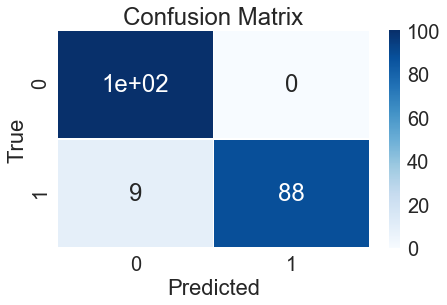

In [192]:
clf1 = DecisionTreeClassifier(max_depth=9,random_state=1024)
clf2 = SVC(C = 4.64,probability=True ,kernel='rbf',random_state=1024)
clf3 = LogisticRegression(C = 10,random_state=3)
clf4 = RandomForestClassifier(max_depth=9,random_state=1024)
clf5 = KNeighborsClassifier(n_neighbors=1)



hardvote = VotingClassifier(estimators=[('dt',clf1),('scv',clf2),('lr',clf3),('rf', clf4),('knn',clf5)],voting='hard')
hardvote.fit(x, y)

print('集成学习-硬投票结果:')
# print('Confusion Matrix Scores:')
print(classification_report(y_test, hardvote.predict(x_test), target_names=['Normal', 'Fraud']))
print('\n\n')



plt.figure(1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test, hardvote.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
sns.set(font_scale=2.0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\n')

集成学习-软投票结果:
             precision    recall  f1-score   support

     Normal       0.93      0.96      0.95       100
      Fraud       0.96      0.93      0.94        97

avg / total       0.94      0.94      0.94       197








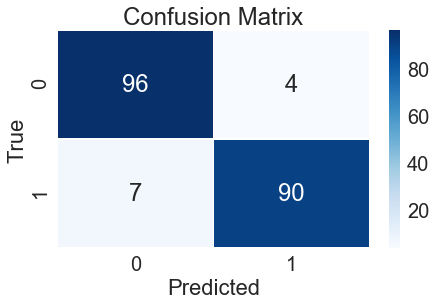

In [189]:
softvote = VotingClassifier(estimators=[('dt',clf1),('scv',clf2),('lr',clf3),('rf', clf4),('knn',clf5)],voting='soft')
softvote.fit(x, y)

print('集成学习-软投票结果:')
# print('Confusion Matrix Scores:')
print(classification_report(y_test, softvote.predict(x_test), target_names=['Normal', 'Fraud']))
print('\n\n')



plt.figure(1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test, softvote.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
sns.set(font_scale=2.0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\n')

&nbsp;&nbsp;&nbsp;&nbsp;<b>stacking模型分类结果</b>：<br>

stacking分类结果:
             precision    recall  f1-score   support

     Normal       0.92      0.95      0.94       100
      Fraud       0.95      0.92      0.93        97

avg / total       0.93      0.93      0.93       197








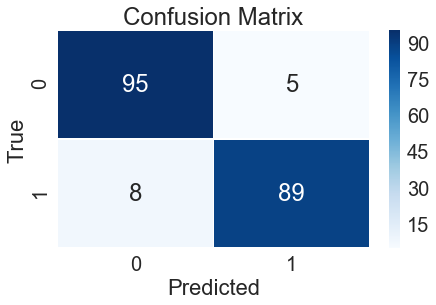

In [188]:
clf_all = StackingClassifier(classifiers=[clf1,clf2,clf3,clf4,clf5],meta_classifier=clf4)

clf_all.fit(x,y)

print('stacking分类结果:')
# print('Confusion Matrix Scores:')
print(classification_report(y_test, clf_all.predict(x_test), target_names=['Normal', 'Fraud']))
print('\n\n')



plt.figure(1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test, clf_all.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
sns.set(font_scale=2.0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\n')

author by -- @<b>Liwu Dong</b>